# PAIRED SAMPLE T-TEST ASSUMPTIONS

[**Analysis 참고 레퍼런스**](https://pythonfordatascienceorg.wordpress.com/paired-samples-t-test-python/)

테스트할 가설은 다음과 같다

- 귀무 가설(H0) : ud = 0, 이는 표본 1과 표본 2 사이의 평균 차이가 0과 같다는 것을 의미
- 대립 가설(H1) : ud ≠ 0, 이는 표본 1과 표본 2 사이의 평균 차이가 0이 아니라는 것을 의미

p-값이 검정된 값(가장 일반적으로 0.05)보다 작으면 귀무 가설을 기각할 수 있다

## 대응표본 T-test 가정

- 치료, 상태 또는 시점 전후의 개인의 혈압을 수집했을 경우

대응표본 t-test 결과를 신뢰할 수 있기 위해서는 다음 가정이 충족되어야 함

- 종속변수(DV)는 구간 또는 비율 척도로 측정되는 연속형이어야 한다
- 관측치는 독립적이다
- DV는 대략 정규 분포를 따라야 한다
(정규성에 위반되는 경우, 중대한 위반이 아닌 한 테스트 결과는 유효한 것으로 간주될 수 있음)
- DV에는 중요한 이상값(outliers)이 포함되어서는 안됨

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/gwangyongkim/Documents/Python/t_test/blood_pressure.csv')
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [3]:
df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


## 대응 T-test 예시

각 변수에 중요한 특이치가 있는지 확인

In [4]:
from scipy import stats

In [5]:
import matplotlib.pyplot as plt

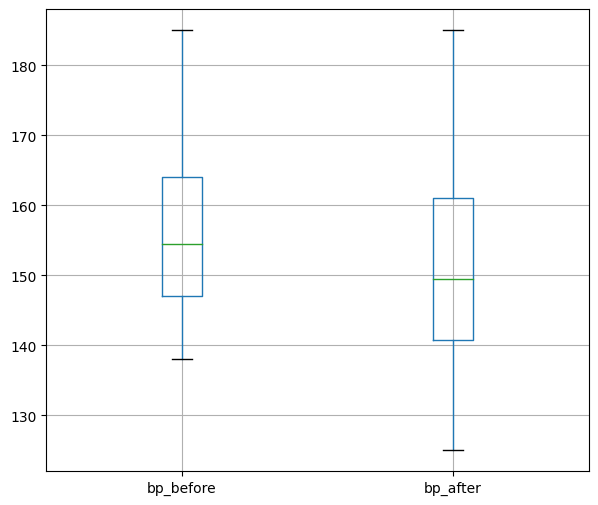

In [6]:
plt.figure(figsize=(7, 6)) #크기 지정
boxplot = df.boxplot(column = ['bp_before','bp_after'])
plt.show()

각 변수에는 이상치가 보이지 않기 때문에, 데이터가 정규 분포에서 나온 것인지 테스트 해보자

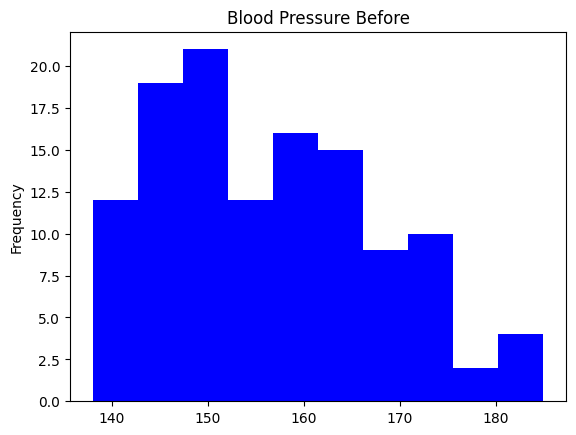

In [7]:
df['bp_before'].plot(kind="hist", title="Blood Pressure Before", color='blue')
plt.savefig('Frequency')

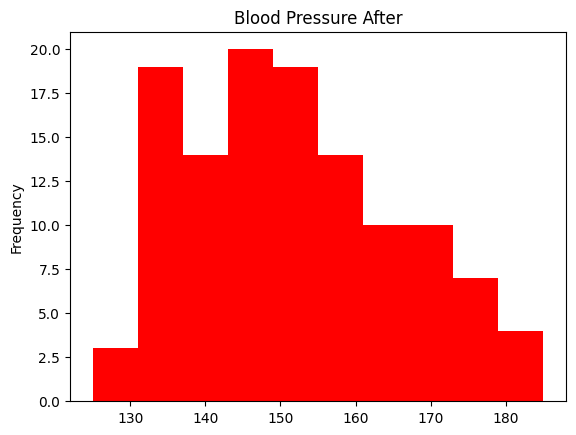

In [8]:
df['bp_after'].plot(kind="hist", title="Blood Pressure After", color='red')
plt.savefig('Frequency')

데이터의 히스토그램이 정규 분포가 아닌 것으로 보임, 약간의 왜곡이 있는 것으로 보여짐
- 데이터가 정규 분포인지 통계적으로 테스트해봐야 함
- 이를 테스트 하기 위해 Shapiro-Wilk 테스트 사용
- 첫 번째 값은 W 테스트 값이고, 두 번째 값은 p-value

In [9]:
stats.shapiro(df['bp_before'])

ShapiroResult(statistic=0.9547785520553589, pvalue=0.0004928281414322555)

In [10]:
stats.shapiro(df['bp_after'])

ShapiroResult(statistic=0.9740641117095947, pvalue=0.0202285498380661)

두 변수 모두 정규성 가정을 크게 위반함 (p-value가 0.05 보다 작음)
- 적절한 대한으로 Wilcoxon signed-rank 테스트를 진행해 볼 수 있음
- 그러나, 데모 목적상 짝을 이룬 t-test를 계속 사용해보겠음
- 이 분석 결과는 정규성에 대한 가정을 크게 위반하기 때문에 유효한 것으로 간주해서는 안됨

대응표본 t-test를 수행하기 위해서는 stats.ttest_rel() 메서드를 사용

In [11]:
stats.ttest_rel(df['bp_before'], df['bp_after'])

TtestResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823, df=119)

귀무가설을 기각할 수 있는 것으로 보임 (정규성에 대한 가정을 크게 위반하기 때문에 유효한 것으로 간주해서는 안됨)